# Importing the required libraries

In [9]:
#ignoreing irrelevant warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#%load_ext autotime
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm._tqdm_notebook import tqdm_notebook, tqdm
tqdm_notebook.pandas()

# Loading the dataset

In [10]:
#loading the dataset
data = pd.read_csv("C://Users//HP//OneDrive//Desktop//VIT//EDA PROJECT//accident-data.csv")
data.head()

,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_casualties,date,day_of_week,time,speed_limit,weather_conditions,road_surface_conditions,urban_or_rural_area
0,2020,10219808,-0.254001,51.462262,3,1,04-02-2020,3,09:00,20,9,9,1
1,2020,10220496,-0.139253,51.470327,3,2,27-04-2020,2,13:55,20,1,1,1
2,2020,10228005,-0.178719,51.529614,3,1,01-01-2020,4,01:25,30,1,2,1
3,2020,10228006,-0.001683,51.541210,2,1,01-01-2020,4,01:50,30,1,1,1
4,2020,10228011,-0.137592,51.515704,3,2,01-01-2020,4,02:25,30,1,1,1


# Shape of the data

In [11]:
#looking at the information about dataset
data.describe() #basic information about dataset like rows,columns and so on

# Check shape of data
rows, columns = data.shape
print(f'There are {rows} rows and {columns} columns in accidents data') 

There are 91197 rows and 13 columns in accidents data


# Cleaning the dataset

In [13]:
# Check records with null entries
data.isnull().sum()

accident_year               0
accident_reference          0
longitude                  14
latitude                   14
accident_severity           0
number_of_casualties        0
date                        0
day_of_week                 0
time                        0
speed_limit                 0
weather_conditions          0
road_surface_conditions     0
urban_or_rural_area         0
dtype: int64

In [14]:
# Drop records with null entries
original_rows = data.shape[0]
data.dropna(inplace=True)
print('Dropped {} records with null entries'.format(original_rows - data.shape[0]))


Dropped 14 records with null entries


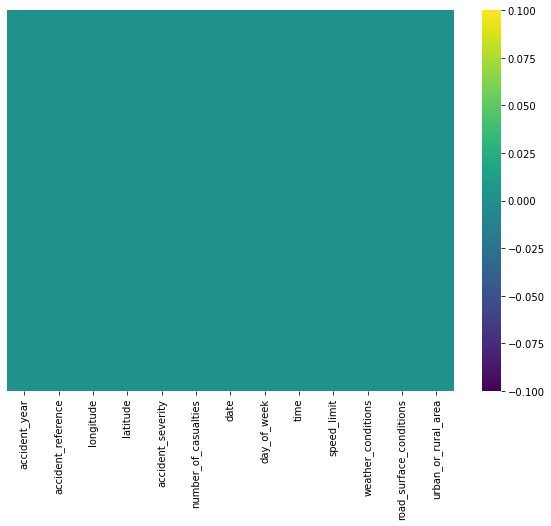

In [15]:
#Now let's check the null values using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap="viridis")
plt.show()

# Detecting the outliers

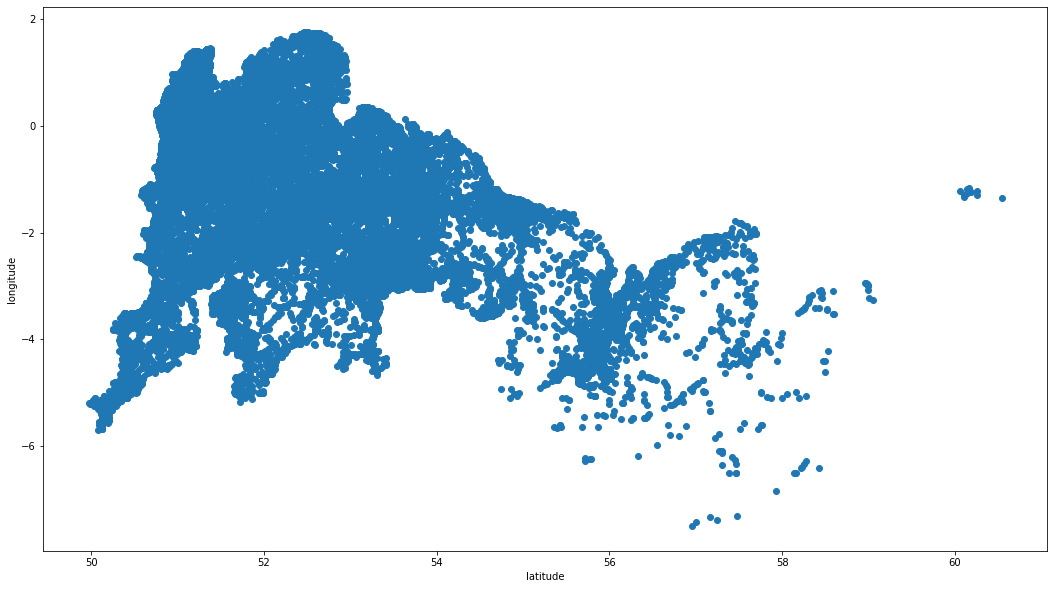

In [16]:
#Finding the outliers in the dataset
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(data['latitude'], data['longitude'])
 
# x-axis label
ax.set_xlabel('latitude')
 
# y-axis label
ax.set_ylabel('longitude')
plt.show()


In [17]:
#Checking the indices of outliers
a=np.where(data['latitude']>58)
#Drop the outliers
data.drop(a[0],inplace=True)

# Data Preparation

In [18]:
# Label major incidents
data['major_incident'] = [1 if (i==1)&(j>=3) else 0 \
                               for i, j in zip(data['accident_severity'], \
                                               data['number_of_casualties'])]

In [19]:
# Convert date and time to timestamp
data['time_stamp'] = data['date'] + ' ' + data['time']
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%d-%m-%Y %H:%M')
# Sort data in chronological order
data = data.sort_values(['time_stamp'], ascending=True, ignore_index=True)

# Extract month and hour from timestamp
data['month'] = data['time_stamp'].dt.month
data['hour'] = data['time_stamp'].dt.hour
data['week_name'] = data['time_stamp'].dt.day_name()

#checking the modified columns
data[['time_stamp', 'month', 'hour', 'week_name']].head()

,time_stamp,month,hour,week_name
0,2020-01-01 00:01:00,1,0,Wednesday
1,2020-01-01 00:05:00,1,0,Wednesday
2,2020-01-01 00:05:00,1,0,Wednesday
3,2020-01-01 00:15:00,1,0,Wednesday
4,2020-01-01 00:15:00,1,0,Wednesday


In [20]:
# List all predictors per type
num_predictors = ['longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties']
cat_predictors = ['day_of_week', 'first_road_class', 'road_type', 'speed_limit', \
                  'junction_detail', 'junction_control', 'second_road_class', \
                  'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', \
                  'light_conditions', 'weather_conditions', 'road_surface_conditions', \
                  'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', \
                  'month', 'hour']

# Visualisation

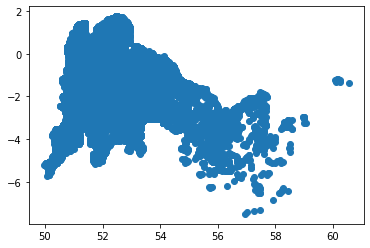

In [21]:
#Ploting the latitude and longitude's    
plt.scatter(x=data['latitude'],y=data['longitude'])
plt.rcParams["figure.figsize"]=(50,35)#Creating figure size
plt.show()

Text(0.5, 1.0, 'No.of accidents')

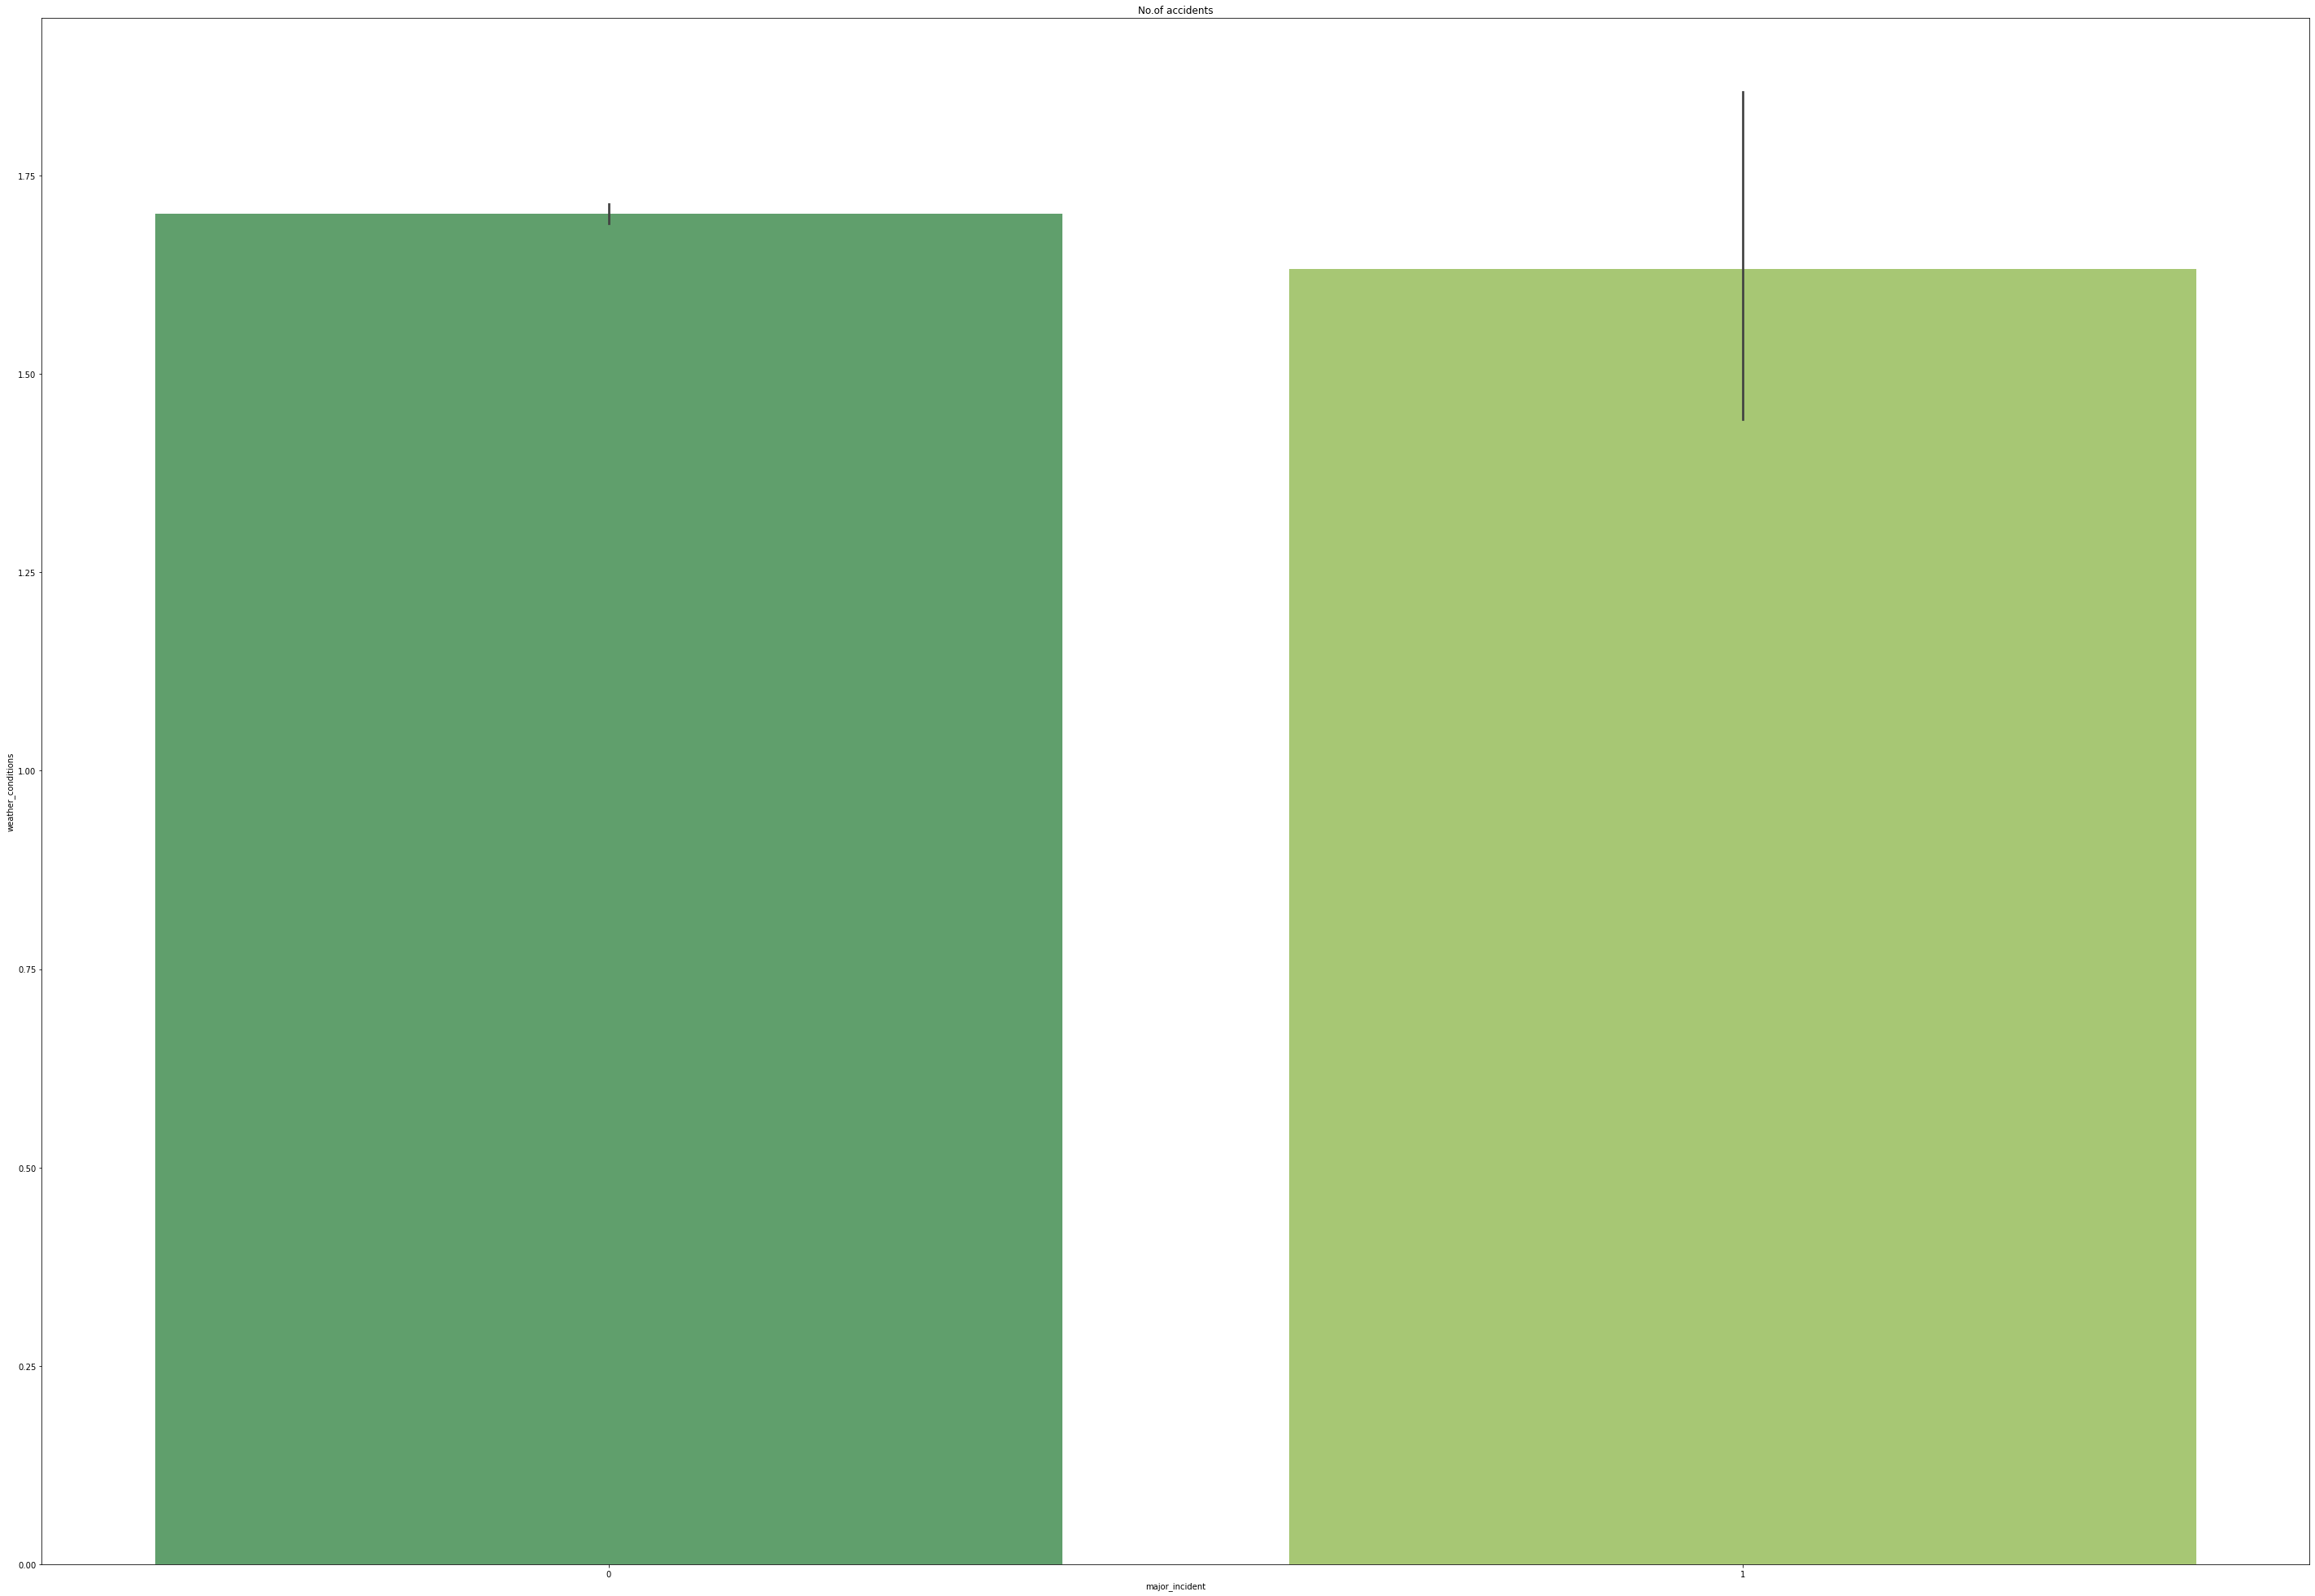

In [22]:
#Bar graph with respect to weather conditions
sns.barplot(x="major_incident",y="weather_conditions",data=data,palette="summer")
plt.title("No.of accidents")

Text(0.5, 1.0, 'No.of accidents')

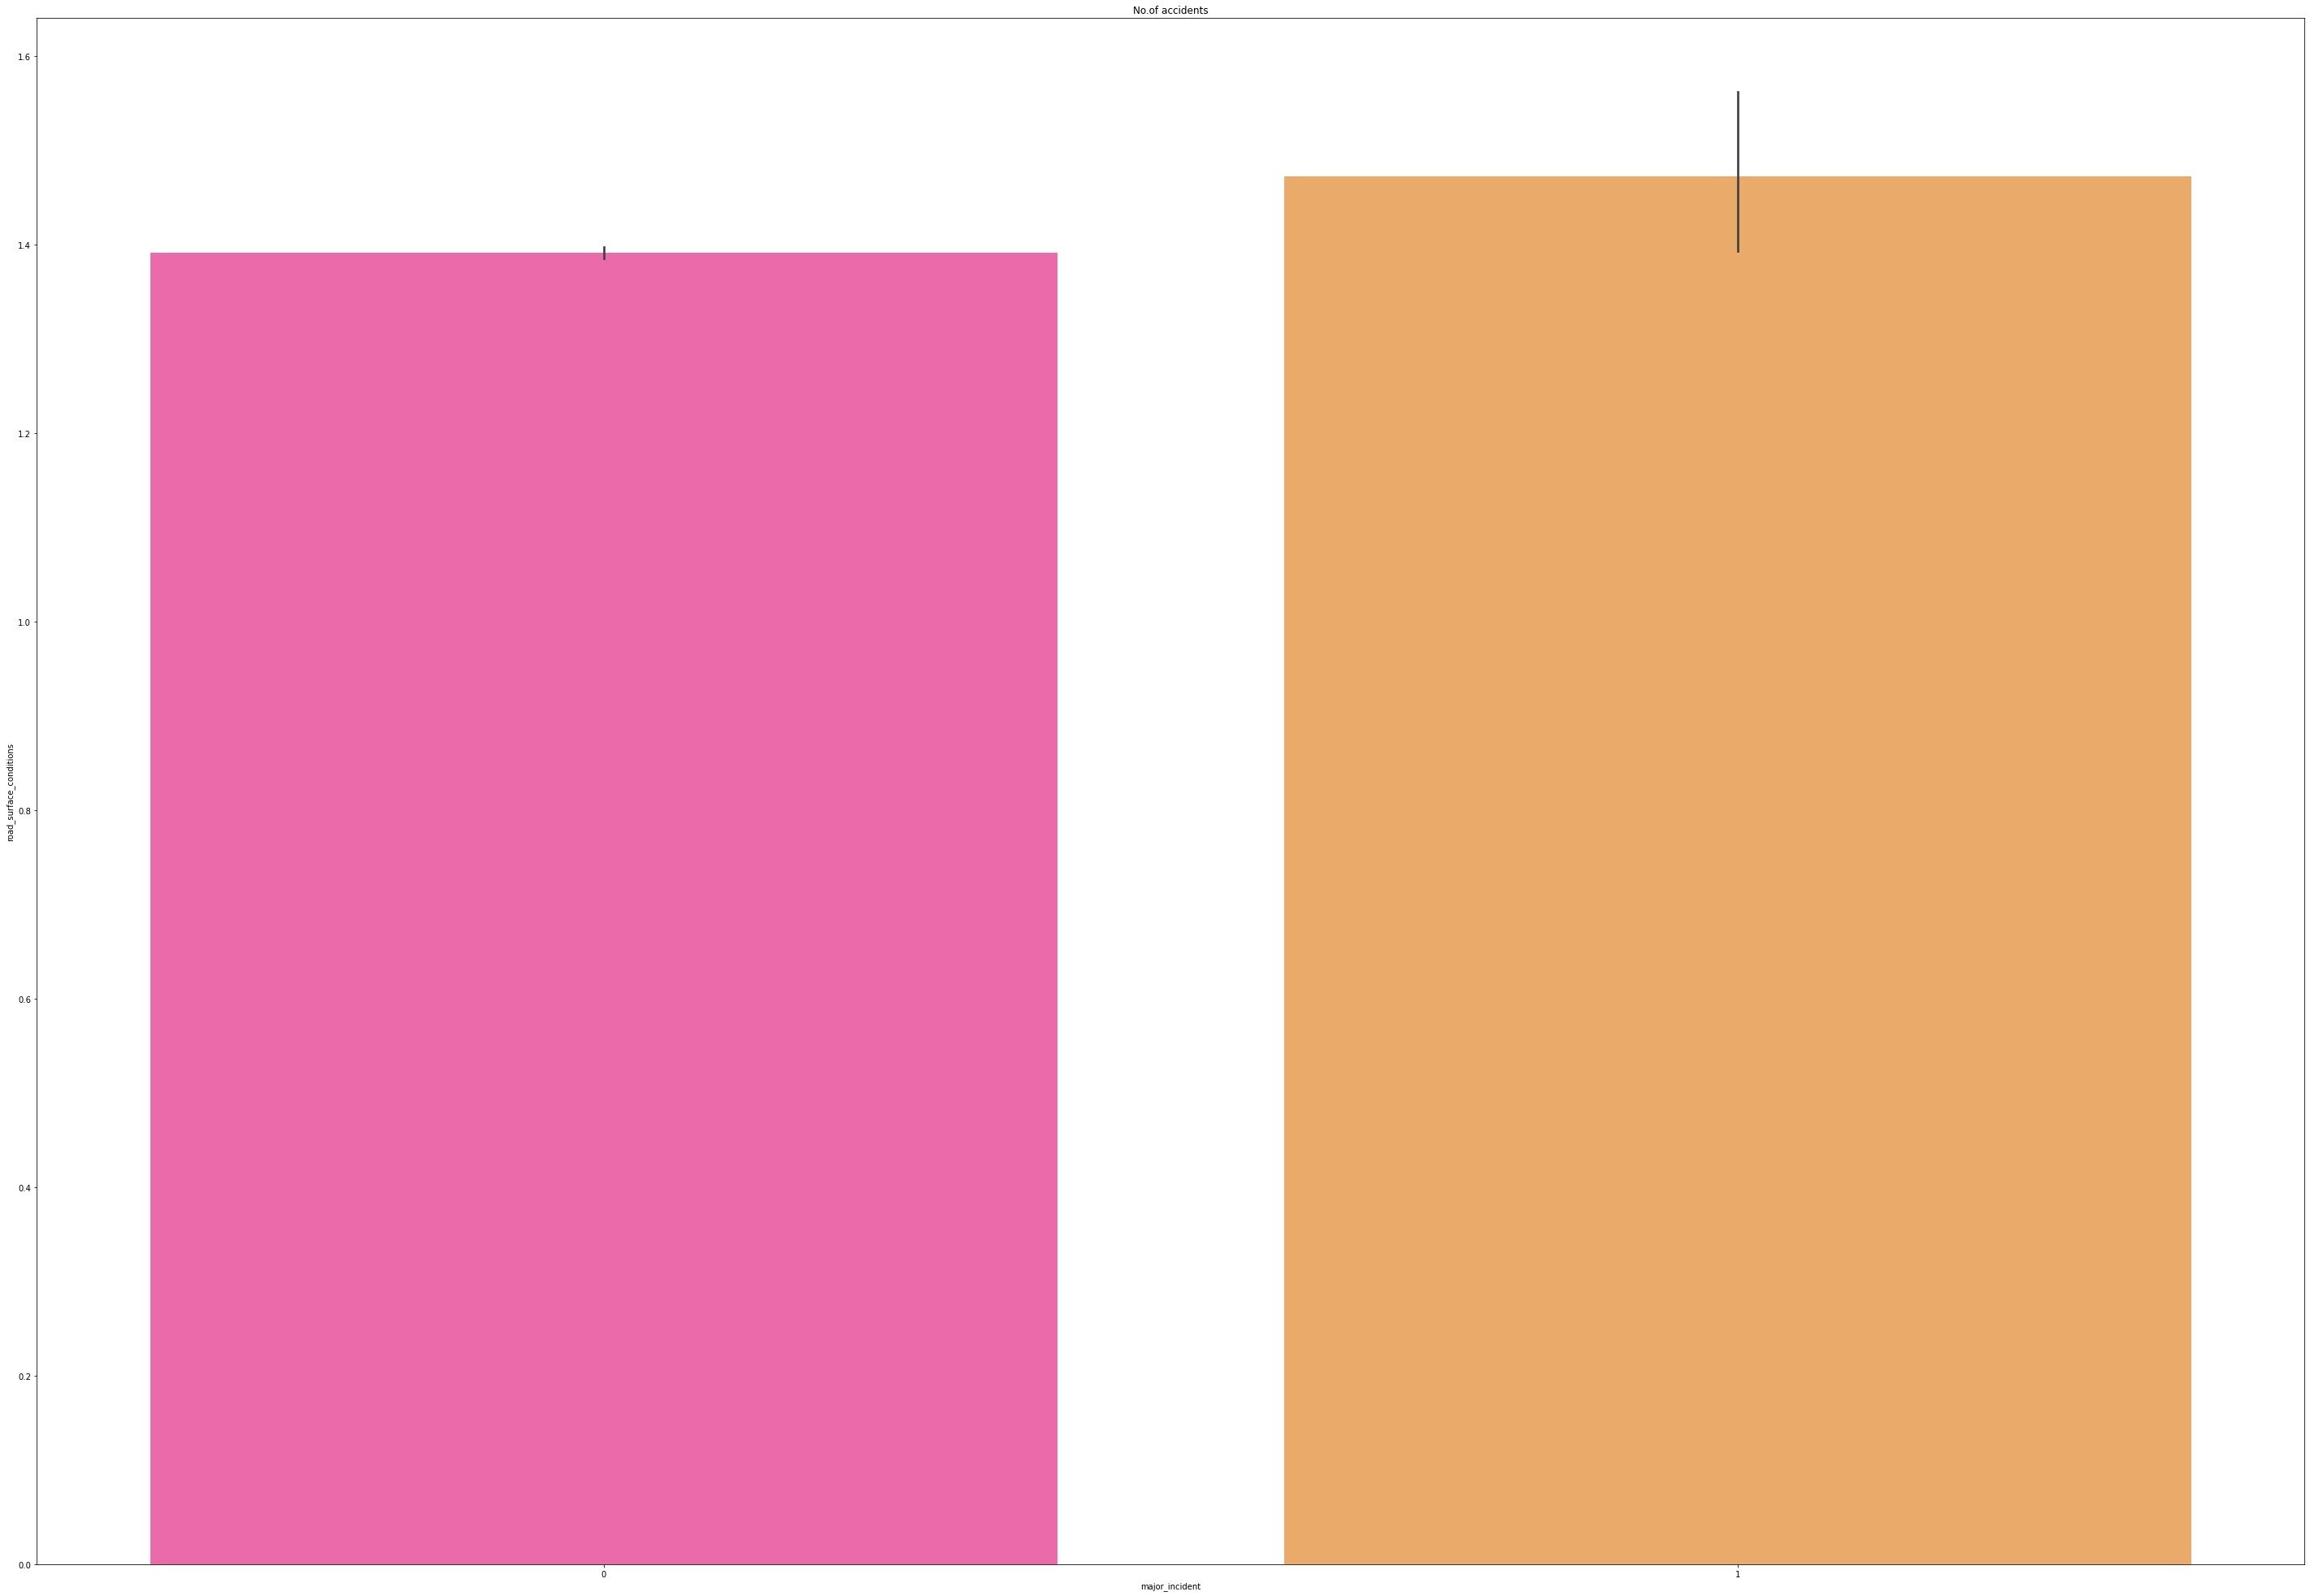

In [23]:
#Bar graph with respect to road surface conditions
sns.barplot(x="major_incident",y="road_surface_conditions",data=data,palette="spring")
plt.title("No.of accidents")

Text(0.5, 1.0, 'No.of accidents')

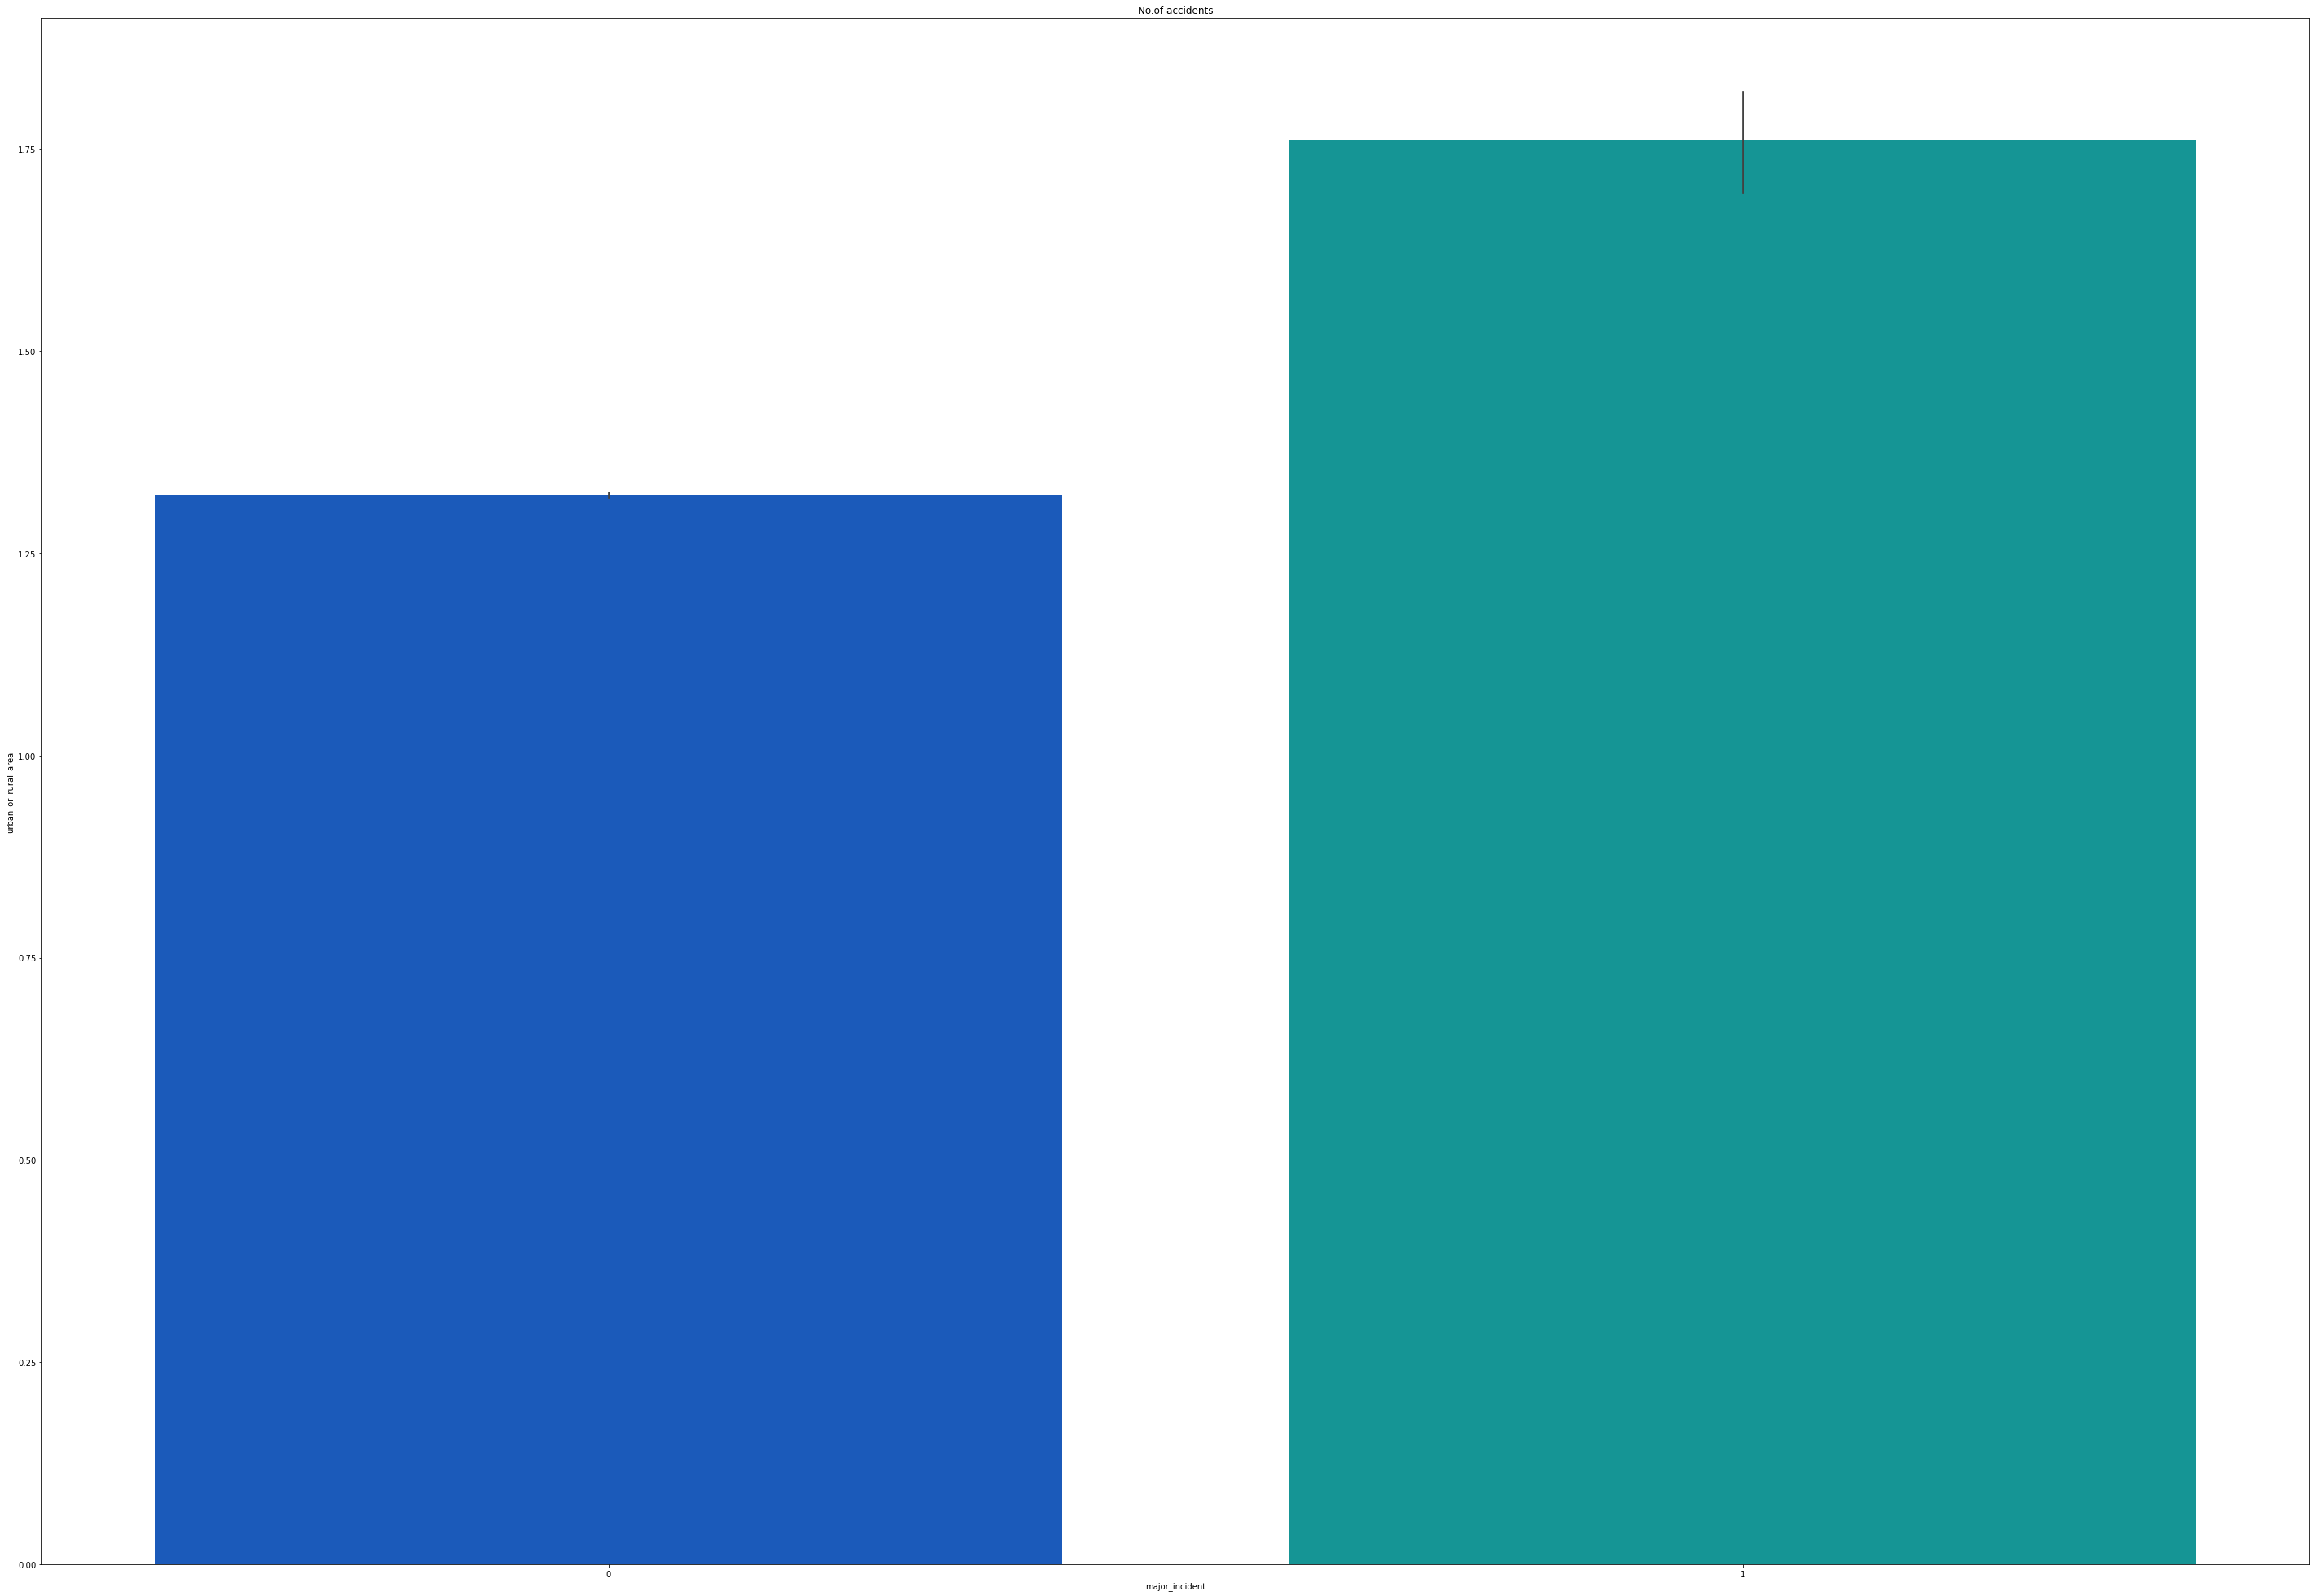

In [24]:
#Bar plot with respect to the areas
sns.barplot(x="major_incident",y="urban_or_rural_area",data=data,palette="winter")
plt.title("No.of accidents")

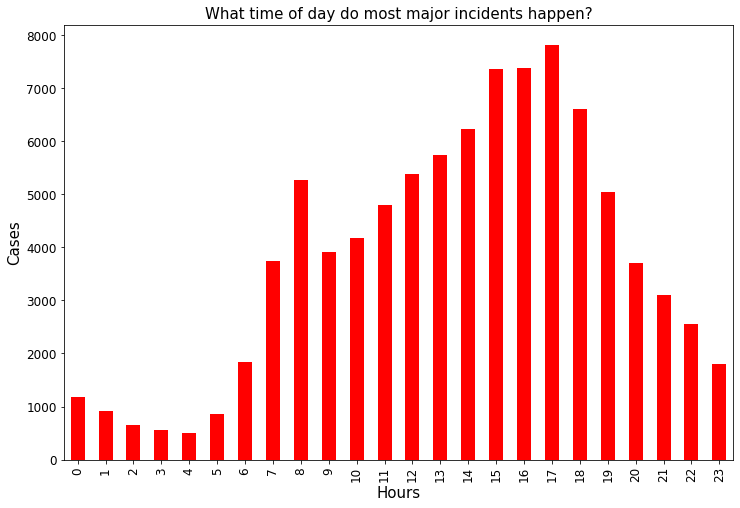

In [25]:
pd.to_datetime(data['time'], format='%H:%M').dt.hour.value_counts().sort_index().plot(
            kind = 'bar', figsize = (12,8), 
            color = 'red', fontsize = 12)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Cases', fontsize = 15)
plt.title('What time of day do most major incidents happen?', fontsize = 15)
plt.show()

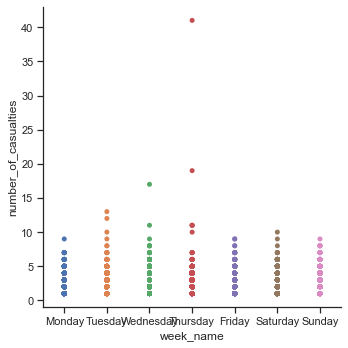

In [26]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_theme(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
sns.catplot(x="week_name",order=order,jitter=False ,y="number_of_casualties", data=data)

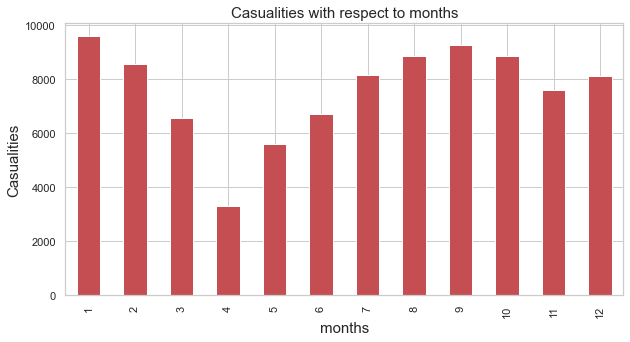

In [27]:
data_month =data['month'].value_counts().sort_index()
#On which month of the year more no.of accidents occured
data_month =data['month'].value_counts().sort_index()
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
data_month.plot( kind = 'bar', color = 'r')
plt.title('Casualities with respect to months', fontsize = 15)
plt.xlabel('months', fontsize = 15)
plt.ylabel('Casualities', fontsize = 15)
plt.show()

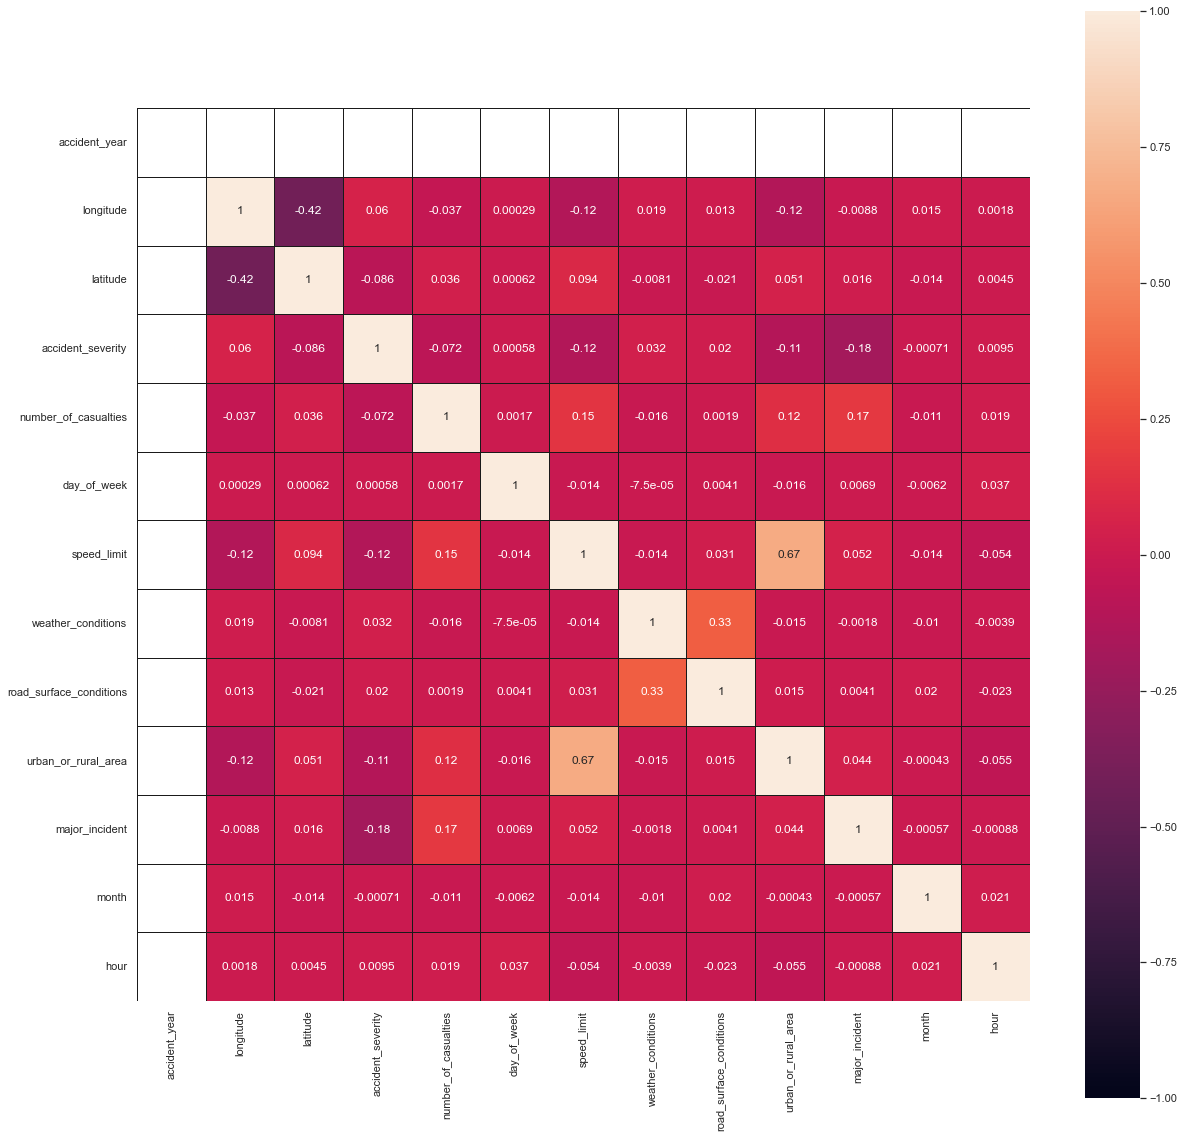

In [28]:
#heat map
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, 
                vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Prediction 

In [29]:
#Using Decision Tree Model to estimate feature importance
features=['latitude','longitude','day_of_week','speed_limit','weather_conditions',\
'road_surface_conditions','urban_or_rural_area','month','hour']
x=data[features].copy()
y=data['major_incident']
tree=DecisionTreeClassifier(random_state=0).fit(x,y)
importances=pd.DataFrame({'Features':x.columns,\
                         'Importance':tree.feature_importances_})

In [30]:
# Check most important predictors
importances.sort_values('Importance', ascending=False).head()

,Features,Importance
0,latitude,0.421718
1,longitude,0.360700
7,month,0.070307
8,hour,0.057693
2,day_of_week,0.031430


In [31]:
# Check for duplicates
df=pd.DataFrame(data,columns=['latitude','longitude'])
duplicate=df[df.duplicated()]
lat=duplicate['latitude']
lat
long=duplicate['longitude']
long


2181    -2.463116
3175    -0.201059
6084    -1.717969
8496    -2.175918
10565   -0.175018
           ...   
88046   -1.821297
88999   -1.907182
89843   -1.107320
89904   -0.184370
90015   -2.342239
Name: longitude, Length: 141, dtype: float64

In [32]:
duplicate["geom"] = duplicate["latitude"].map(str) + ',' + duplicate["longitude"].map(str)
#duplicate["geom"][0]
print(duplicate["geom"])
duplicate['frequency'] = duplicate.groupby(by=["latitude","longitude"]).cumcount()+1

2181      50.66195,-2.463116
3175     51.452208,-0.201059
6084     53.006246,-1.717969
8496      52.58679,-2.175918
10565    51.876607,-0.175018
                ...         
88046    53.595536,-1.821297
88999    52.455308,-1.907182
89843     53.299608,-1.10732
89904     51.530709,-0.18437
90015    53.505414,-2.342239
Name: geom, Length: 141, dtype: object


In [33]:
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [34]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="my bar!")
tqdm.pandas()
duplicate["address"] = duplicate["geom"].progress_apply(rgeocode)
duplicate.head()

  0%|          | 0/141 [00:00<?, ?it/s]

,latitude,longitude,geom,frequency,address
2181,50.661950,-2.463116,"50.66195,-2.463116",1,"(Weymouth Relief Road, West Farm, Bincombe, Up..."
3175,51.452208,-0.201059,"51.452208,-0.201059",1,"(SW18 20, West Hill Road, Southfields, London ..."
6084,53.006246,-1.717969,"53.006246,-1.717969",1,"(The Co-operative Food, Derby Road, Ashbourne ..."
8496,52.586790,-2.175918,"52.58679,-2.175918",1,"(Spar Compton Post Office, Bridgnorth Road, Co..."
10565,51.876607,-0.175018,"51.876607,-0.175018",1,"(Ashdown Road, Hertford Road, Broadwater, Stev..."
